# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

# 1. Loading the data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<font color='red'> Reading the csv file </font>

In [2]:
import pandas as pd
filepath = '/content/drive/My Drive/Colab Notebooks/Assignments/As15_Recommendation Systems and Truncated SVD SGD algorithm to predict ratings/'

data=pd.read_csv(filepath+ 'ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [3]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [4]:
from scipy.sparse import csr_matrix
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

adjacency_matrix = csr_matrix((data['rating'].values, (data['user_id'].values, data['item_id'].values))) # csr_matrix((data, (row_ind, col_ind))
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [5]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [6]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [7]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
U, sigma, VT = randomized_svd(adjacency_matrix, n_components = 100)
print(U.shape)
print(sigma.shape)
print(VT.T.shape)

(943, 100)
(100,)
(1681, 100)


<font color='red'>Compute mean of ratings</font>

In [8]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    
    return ratings.mean(axis=0) 

In [9]:
mu=m_u(data['rating'])
print('mean of all ratings : ', mu)

mean of all ratings :  3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [10]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [11]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 

    return np.zeros(dim)

In [12]:
# give the number of dimensions for b_i (Here b_i corresponds to users)
b_i= initialize(U.shape[0])

In [13]:
# give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(VT.shape[1])

<font color='cyan'>Grader function -3 </font>

In [14]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

Other Functions

In [15]:
def predict_rating(user_id, item_id, mu, b_i, c_j, U, VT):
    '''This function will predict the rating for given user and item'''

    y_ij_hat = mu + b_i[user_id].reshape(-1,1) + c_j[item_id].reshape(-1,1) + np.dot(U[user_id], VT.T[item_id])

    return y_ij_hat

In [16]:
def compute_loss(y_actual, y_pred, mu, b_i, c_j, U, VT, alpha):
    '''This function is the objective loss function that we are minimizing'''
    
    loss = np.linalg.norm((y_actual - y_pred), 2) + alpha * (np.linalg.norm(U, 2) + np.linalg.norm(VT, 2) + np.linalg.norm(b_i, 2) + np.linlag.norm(c_j, 2))

    return  loss

<font color='red'>Compute dL/db_i</font>

In [17]:
def derivative_db(user_id, item_id, rating, U, VT, mu, alpha):
    '''This function computes the derivative of loss with respect to user bias'''

    # https://blog.insightdatascience.com/explicit-matrix-factorization-als-sgd-and-all-that-jazz-b00e4d9b21ea
    
    rating_predicted = predict_rating(user_id, item_id, mu, b_i, c_j, U, VT)
    db = 2*alpha* b_i[user_id] - 2*(rating - rating_predicted)

    return db

<font color='cyan'>Grader function -4 </font>

In [18]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [19]:
def derivative_dc(user_id,item_id,rating,U,VT,mu, alpha):
    '''In this function, we will compute dL/dc_j'''

    # https://blog.insightdatascience.com/explicit-matrix-factorization-als-sgd-and-all-that-jazz-b00e4d9b21ea
    
    rating_predicted = predict_rating(user_id, item_id, mu, b_i, c_j, U, VT)
    
    dc = 2*alpha*c_j[item_id] - 2*(rating - rating_predicted)

    return dc

<font color='cyan'>Grader function - 5 </font>

In [20]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,alpha)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [21]:
from sklearn.metrics import mean_squared_error

epochs= 50
alpha= 0.01
learning_rate = 0.01

losses = []

b_i = initialize(U.shape[0])
c_j = initialize(VT.shape[1])

for epoch in range(1, epochs+1): # For each epoch
    predicted_rating = []
    for ind in range(len(data)):  # For each data point
        db = derivative_db(data['user_id'][ind], data['item_id'][ind], data['rating'][ind], U, VT, mu, alpha) # Derivative of loss w.r.to user_bias
        dc = derivative_dc(data['user_id'][ind], data['item_id'][ind], data['rating'][ind], U, VT, mu, alpha) # Derivative of loss w.r.to item_bias

        b_i[data['user_id'][ind]] -= learning_rate * db    # Update rule for user_bias
        c_j[data['item_id'][ind]] -= learning_rate * dc    # Update rule for item bias

        # Predicting the rating with updated bias values
        predicted_rating.append(predict_rating(data['user_id'][ind], data['item_id'][ind], mu, b_i, c_j, U, VT)[0][0])

    loss = mean_squared_error(data['rating'].values, np.array(predicted_rating))  # Calculating mean_squared error
    losses.append(loss)
    if epoch > 1:
        # print(epoch, round(losses[epoch-2] - losses[epoch-1],5))
        if (losses[epoch-2] - losses[epoch-1] <= 0.0001):  # Break the loop if update is less than 0.0001
            break

# print(epoch, round(losses,5)

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

In [22]:
import matplotlib.pyplot as plt

def plot_epoch_mse(losses):
    '''Plot loss for each epoch'''            

    plt.figure(figsize = (9,6))
    plt.plot(range(1, len(losses)+1), losses, label = 'train loss')   # train loss curve
    plt.legend()     # add legend
    plt.xlabel('epochs', fontsize= 12)    # xlabel
    plt.ylabel('loss', fontsize = 12)     # ylabel
    plt.title('loss vs epoch plot', fontsize= 14)
    plt.grid(True)                        # adds grid
    plt.show()

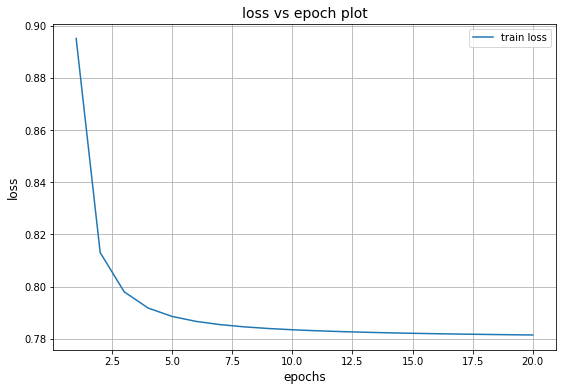

In [23]:
plot_epoch_mse(losses)

# <font color='red'> Task 2</font>

In [24]:
data2 = pd.read_csv(filepath + 'user_info.csv.txt')
data2.head(2)

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2


In [25]:
data2.describe()

,user_id,age,is_male,orig_user_id
count,943.000000,943.000000,943.000000,943.000000
mean,471.000000,34.051962,0.710498,472.000000
std,272.364951,12.192740,0.453772,272.364951
min,0.000000,7.000000,0.000000,1.000000
25%,235.500000,25.000000,0.000000,236.500000
50%,471.000000,31.000000,1.000000,472.000000
75%,706.500000,43.000000,1.000000,707.500000
max,942.000000,73.000000,1.000000,943.000000


In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Logistic regression model without scaling
model = SGDClassifier(loss= 'log', penalty='l2', class_weight = 'balanced')
model.fit(U, data2['is_male'])
y_hat = model.predict_proba(U)[:,1]

In [27]:
# Random model
y_hat_dummy = [np.random.randint(0,2) for _ in range(len(data2['is_male']))]

In [28]:
# Logistic regression model with standard scaling
std_scaler = StandardScaler()
U_std_scaled = std_scaler.fit_transform(U)
model.fit(U_std_scaled, data2['is_male'])
y_hat_std_scaled = model.predict_proba(U_std_scaled)[:,1]

In [29]:
# Logistic regression model with min-max scaling 
minmax_scaler = MinMaxScaler()
U_minmax_scaled = minmax_scaler.fit_transform(U)
model.fit(U_minmax_scaled, data2['is_male'])
y_hat_minmax_scaled = model.predict_proba(U_minmax_scaled)[:,1]

In [30]:
print('Log-loss of random model                                    : ', round(log_loss(data2['is_male'], y_hat_dummy),3))
print('Log-loss of Logistic regression model without scaling       : ', round(log_loss(data2['is_male'], y_hat),3))
print('Log-loss of Logistic regression model with standard scaling : ', round(log_loss(data2['is_male'], y_hat_std_scaled),3))
print('Log-loss of Logistic regression model with min-max scaling  : ', round(log_loss(data2['is_male'], y_hat_minmax_scaled),3))

Log-loss of random model                                    :  18.35
Log-loss of Logistic regression model without scaling       :  0.549
Log-loss of Logistic regression model with standard scaling :  1.534
Log-loss of Logistic regression model with min-max scaling  :  0.493


### Observation

    1. Yes. Decomposed user vector can be used as feature vector to predict if gender is male
    2. Logistic regression with min-max scaling is performing slightly better 
    than without scaling and much better than standard scaling and random model 

## 10. bonus: Matrix Factorization using SVD

$$
L = \min_{ ui,vj}
\quad
\sum_{i,j}
    ||x_{ij} - u_i v_j^T||^2
$$

In [31]:
def derivative_u(user_id, item_id, rating, U, VT):
    ''' This function computes the derivative of loss w.r.to user '''
        
    predicted_rating = np.dot(U[user_id], VT.T[item_id])
    du = -2 * VT.T[item_id] * (rating - predicted_rating)

    return du

In [32]:
def derivative_v(user_id, item_id, rating, U, VT):
    ''' This function computes the derivative of loss w.r.to item '''
    
    predicted_rating = np.dot(U[user_id], VT.T[item_id])
    dv = -2 * U[user_id] * (rating - predicted_rating)

    return dv

In [33]:
from sklearn.metrics import mean_squared_error

epochs= 50
alpha= 0.01
learning_rate = 0.01

K = 100
U = np.random.rand(adjacency_matrix.shape[0], K)
VT = np.random.rand(K, adjacency_matrix.shape[1])

losses = []

for epoch in range(1, epochs+1): # For each epoch
    predicted_rating = []
    for ind in range(len(data)):  # For each data point
        du = derivative_u(data['user_id'][ind], data['item_id'][ind], data['rating'][ind], U, VT) # Derivative of loss w.r.to user
        dv = derivative_v(data['user_id'][ind], data['item_id'][ind], data['rating'][ind], U, VT) # Derivative of loss w.r.to item

        U[data['user_id'][ind]] -= learning_rate * du    # Update rule for user
        VT.T[data['item_id'][ind]] -= learning_rate * dv    # Update rule for item

        # Predicting the rating with updated values
        predicted_rating.append(np.dot(U[data['user_id'][ind]], VT.T[data['item_id'][ind]]))

    loss = mean_squared_error(data['rating'].values, np.array(predicted_rating))  # Calculating mean_squared error
    losses.append(loss)
    if epoch > 1:
        # print(epoch, round(losses[epoch-2] - losses[epoch-1],5))
        if (losses[epoch-2] - losses[epoch-1] <= 0.0001):  # Break the loop if update is less than 0.0001
            break

# print(epoch, round(losses,5)

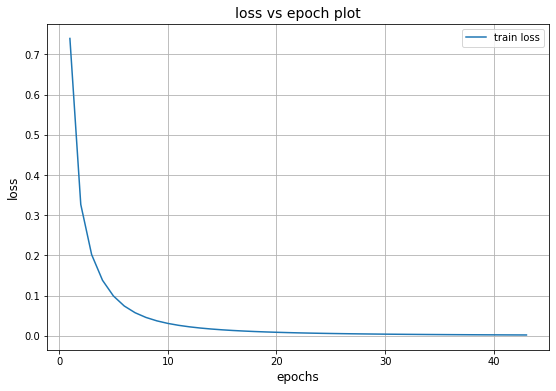

In [34]:
plot_epoch_mse(losses)

U, VT are matrix factors of k (100) dimensions of the adjacency matrix